In [1]:
# load this file in google colab and select T4(GPU) as runtime type
# Or use PC with GPU before running due to limited computational resources on a local PC with GPU
# Checking for access to GPU to run our model

!nvidia-smi

Thu Apr 11 13:43:02 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [7]:
#mount your google drive
from google.colab import drive
drive = drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# To check for current working directory

# import os
# HOME = os.getcwd()
# print(HOME)

/content


In [3]:
# Pip install ultralytics and import the necessary libraries

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.1/78.2 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

The codes below are to train, validate or run inference on models using the YOLO Command Line Interface (CLI).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [ ]:
!pip install inference

In [10]:
# Pip install roboflow to download annotated datasets using Roboflow API

#!pip install roboflow #--quiet

from roboflow import Roboflow
rf = Roboflow(api_key="Ja3foJbfMDtBrkuuAv35") #api key to connect our capstone Project hosted on Roboflow
project = rf.workspace("capstone-project-2wtea").project("crop-disease-identification") #location of the dataset stored in the project workspace
version = project.version(6) #change this number to correspond to the version of the dataset you want to download
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Crop-Disease-Identification-6 in yolov8:: 100%|██████████| 30428/30428 [04:19<00:00, 117.42it/s]


In [11]:
# Training our model using YOLOv8s-seg.pt for instance segmentation
# no of epochs = 10
# image size = 640

%cd {'/content/drive/MyDrive'}

!yolo task=segment mode=train model=yolov8s-seg.pt data={dataset.location}/data.yaml epochs=10 imgsz=640 #batch=100

/content/drive/MyDrive
100% 22.8M/22.8M [00:00<00:00, 126MB/s] 
New https://pypi.org/project/ultralytics/8.1.46 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/content/drive/MyDrive/Crop-Disease-Identification-6/data.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True

In [16]:
# Listing the files and subdirectories related to the segementation training process.

!ls {'/content/drive/MyDrive'}/runs/segment/train/

args.yaml					    labels.jpg	      train_batch2.jpg
BoxF1_curve.png					    MaskF1_curve.png  val_batch0_labels.jpg
BoxP_curve.png					    MaskP_curve.png   val_batch0_pred.jpg
BoxPR_curve.png					    MaskPR_curve.png  val_batch1_labels.jpg
BoxR_curve.png					    MaskR_curve.png   val_batch1_pred.jpg
confusion_matrix_normalized.png			    results.csv       val_batch2_labels.jpg
confusion_matrix.png				    results.png       val_batch2_pred.jpg
events.out.tfevents.1712844077.1dfc10083e51.6551.0  train_batch0.jpg  weights
labels_correlogram.jpg				    train_batch1.jpg


/content/drive/MyDrive


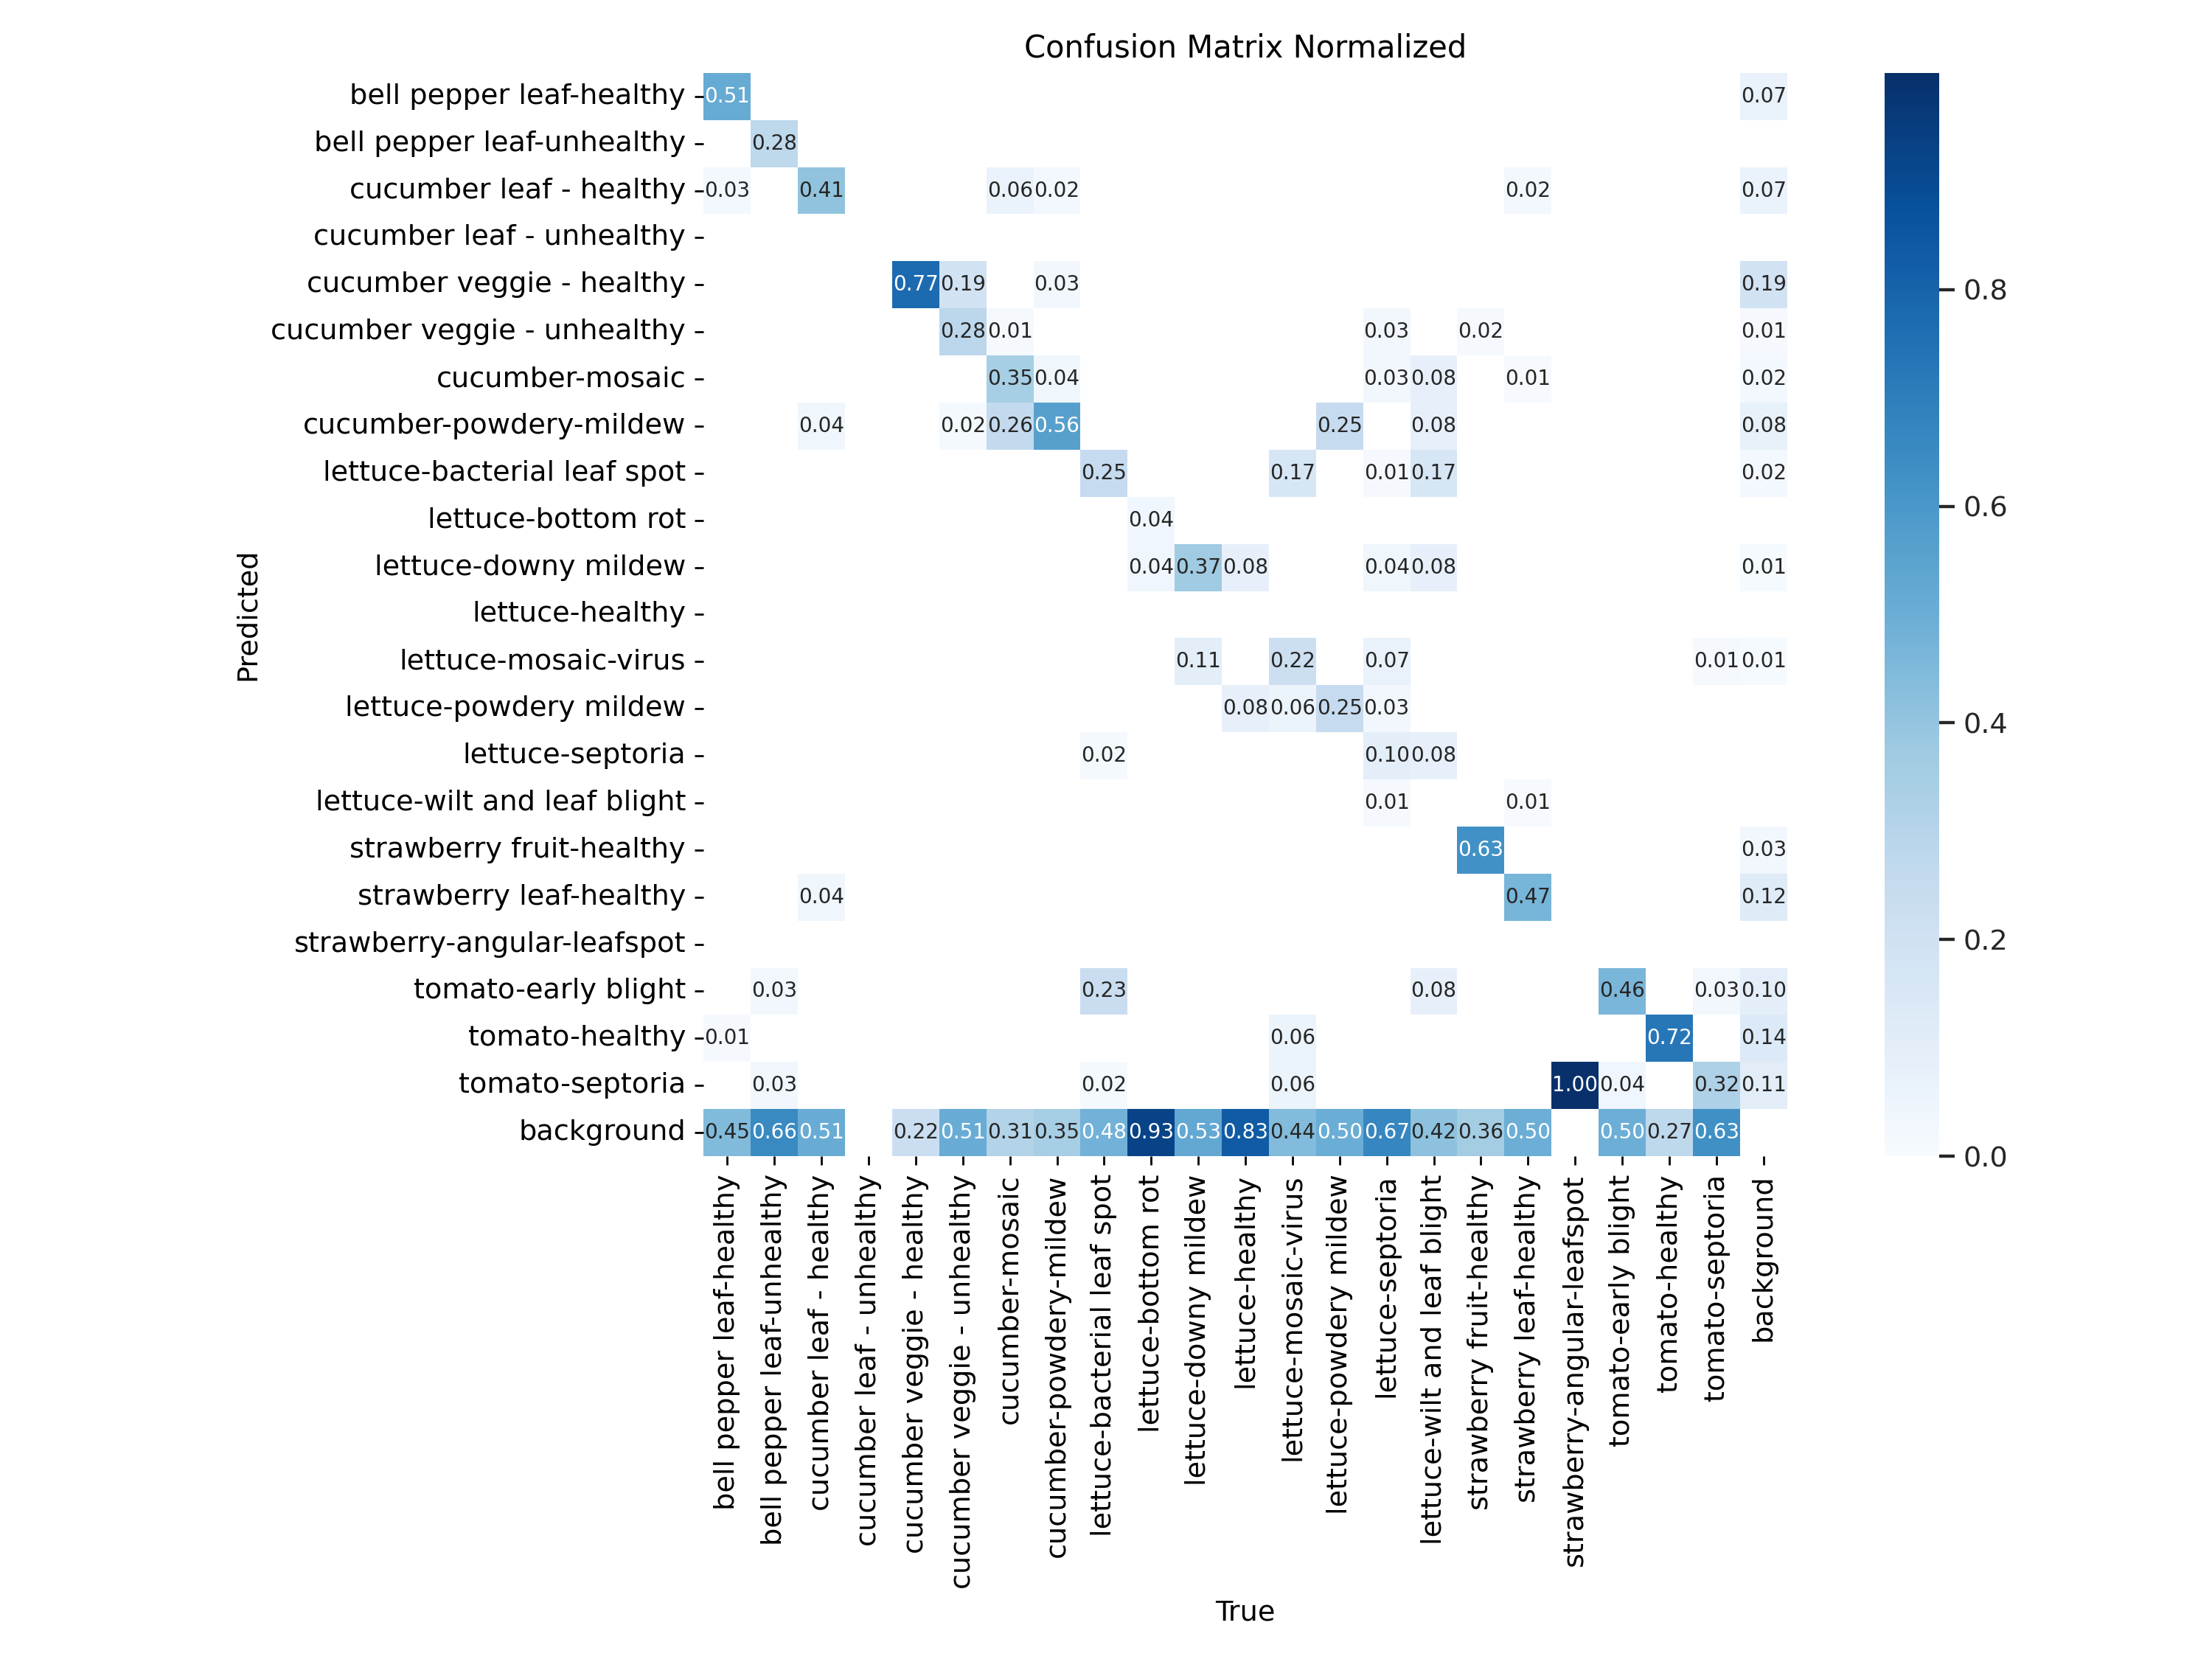

In [26]:
# Display the normalised confusion matrix for the trained model

Image(filename= '/content/drive/MyDrive/runs/segment/train/confusion_matrix_normalized.png', width=1200)

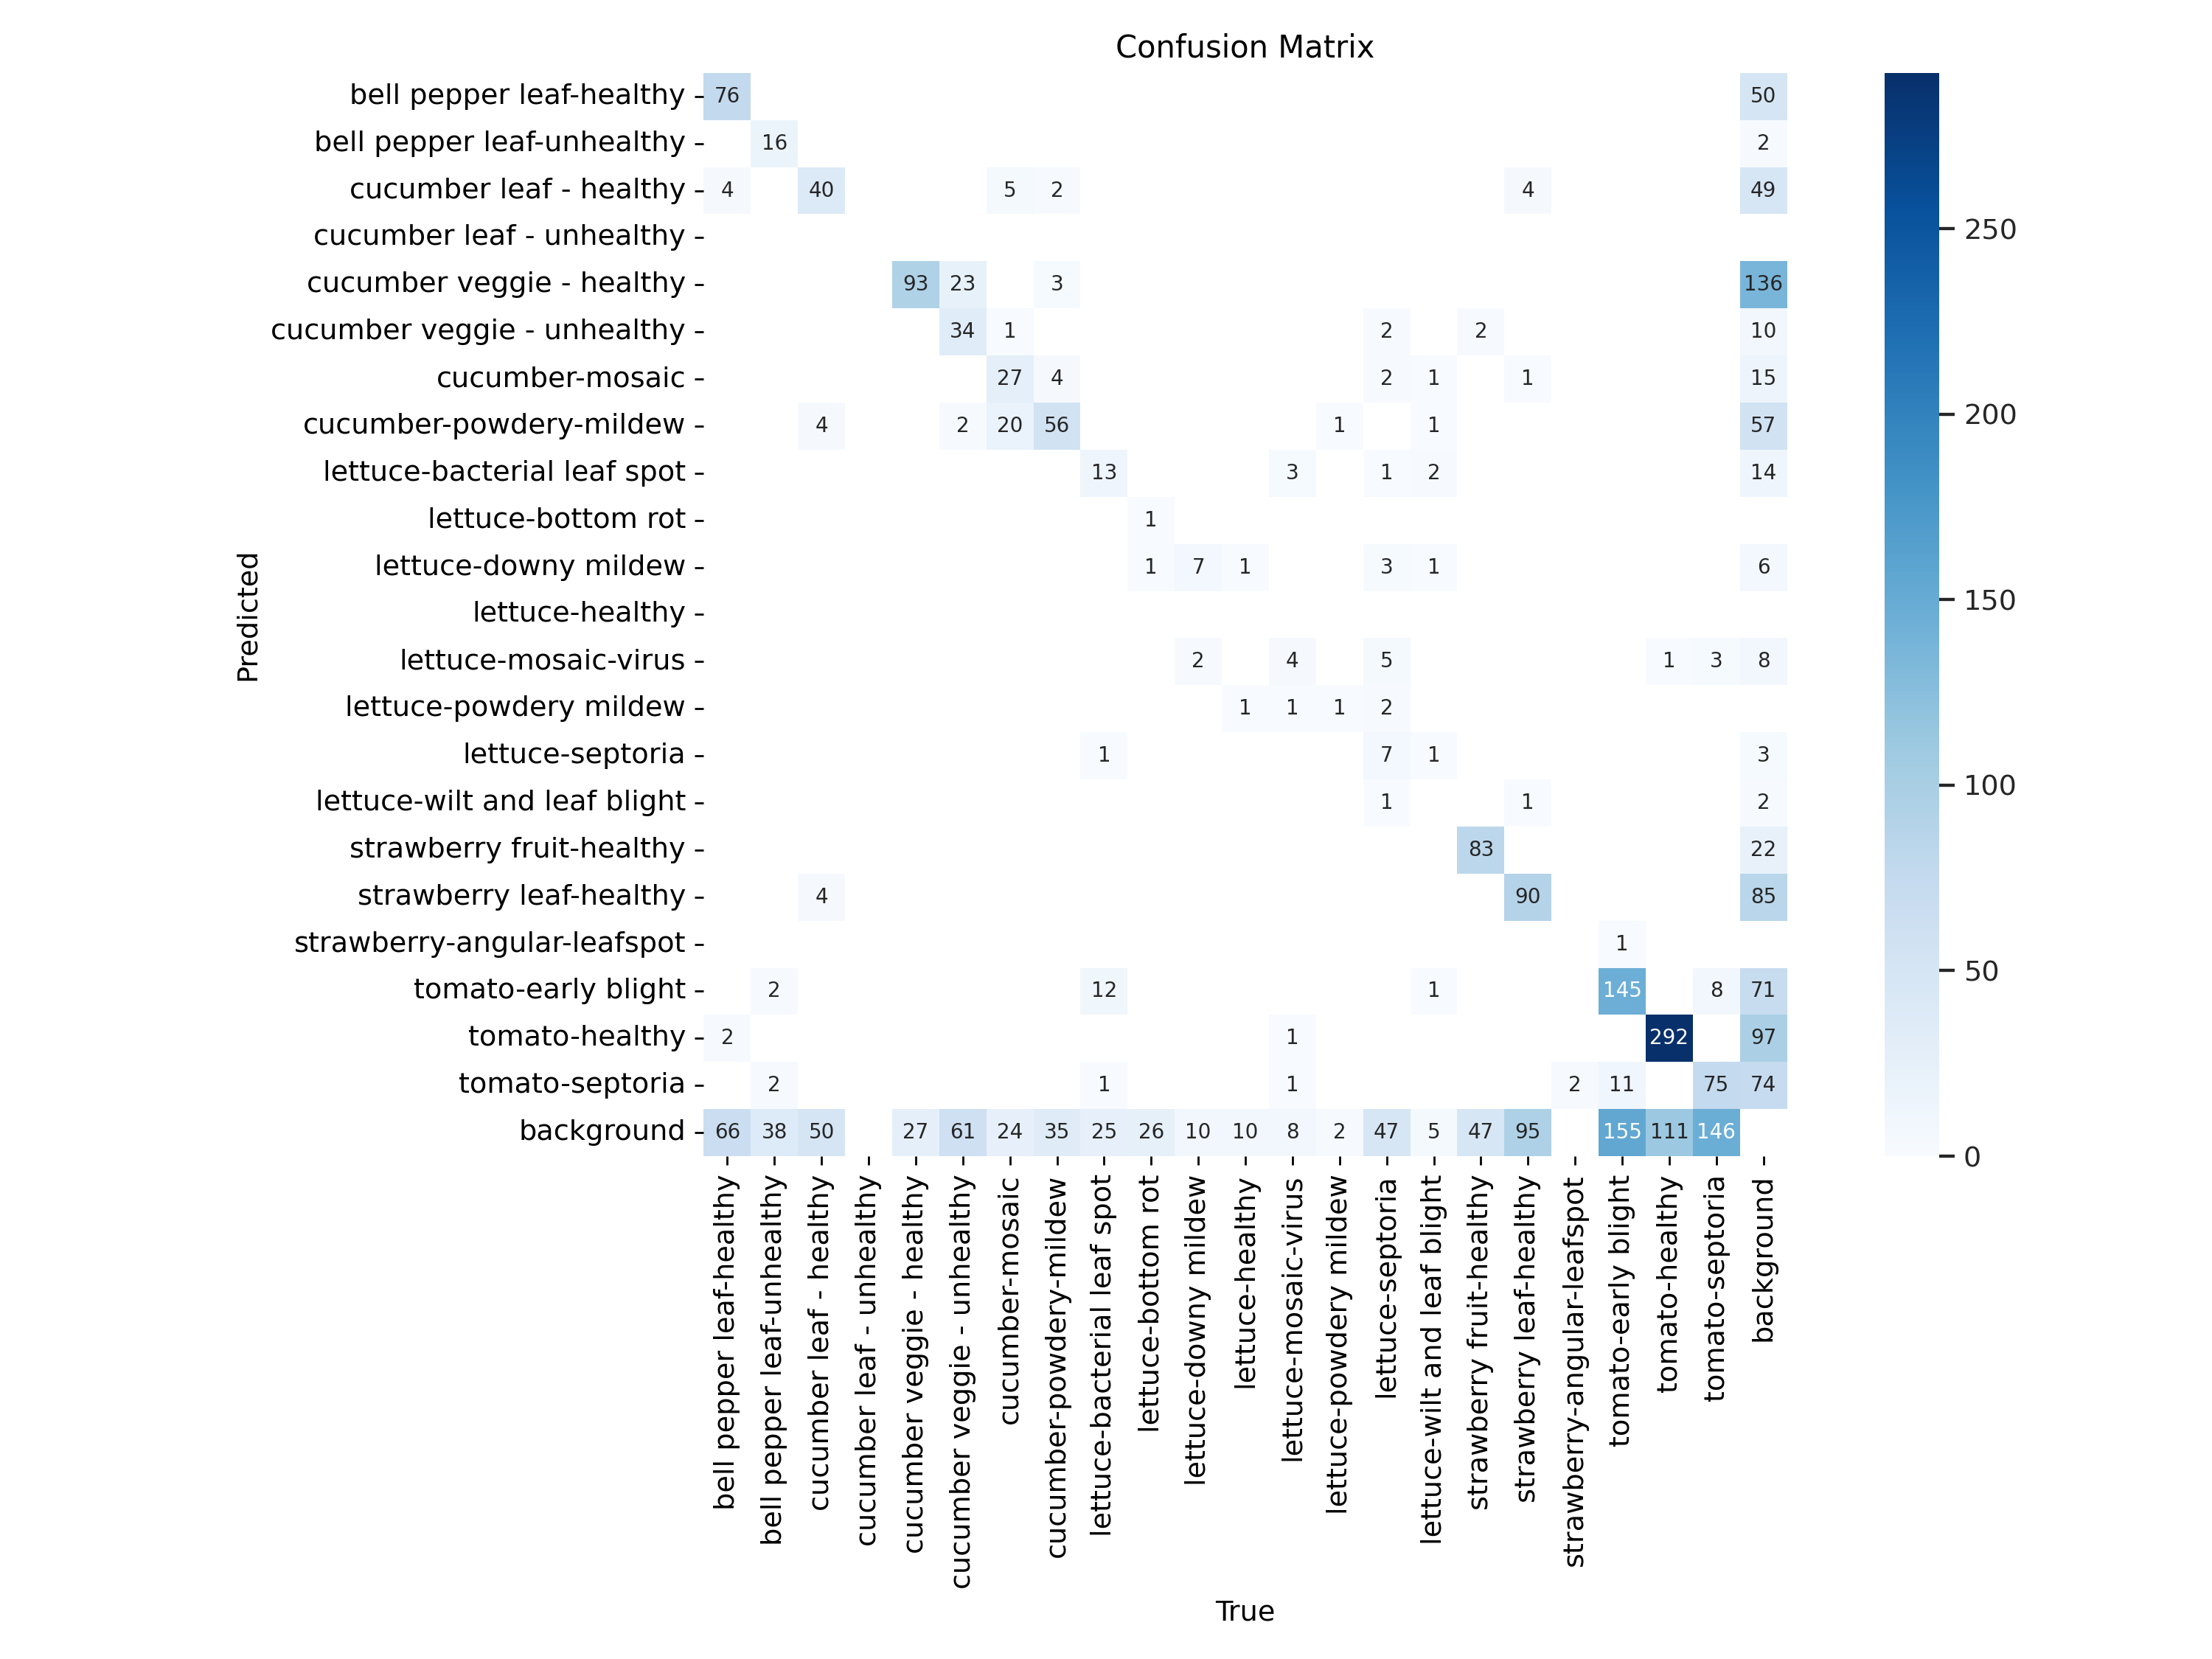

In [27]:
# Display the confusion matrix for the trained model

Image(filename='/content/drive/MyDrive/runs/segment/train/confusion_matrix.png', width=1200)

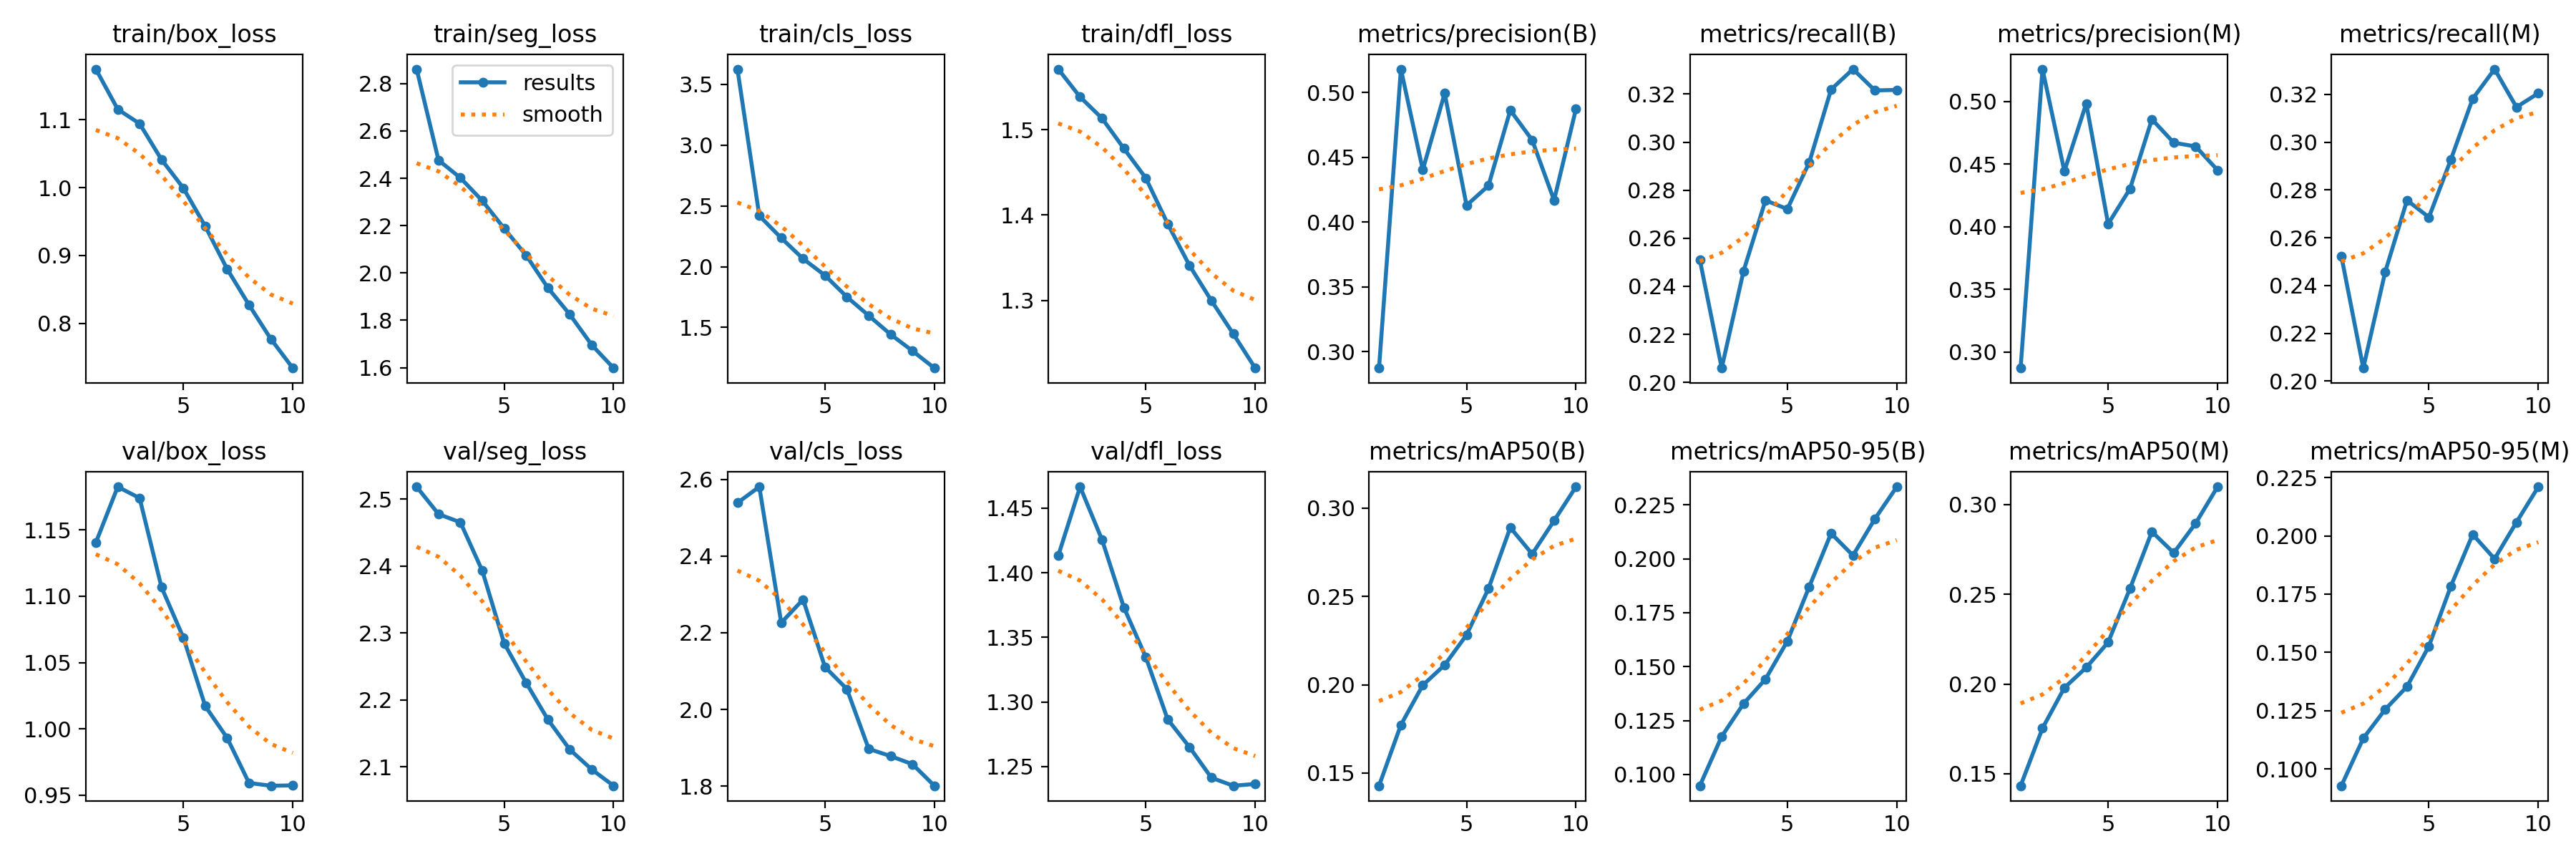

In [28]:
# Display the results of our training and validations

Image(filename='/content/drive/MyDrive/runs/segment/train/results.png', width=1200)

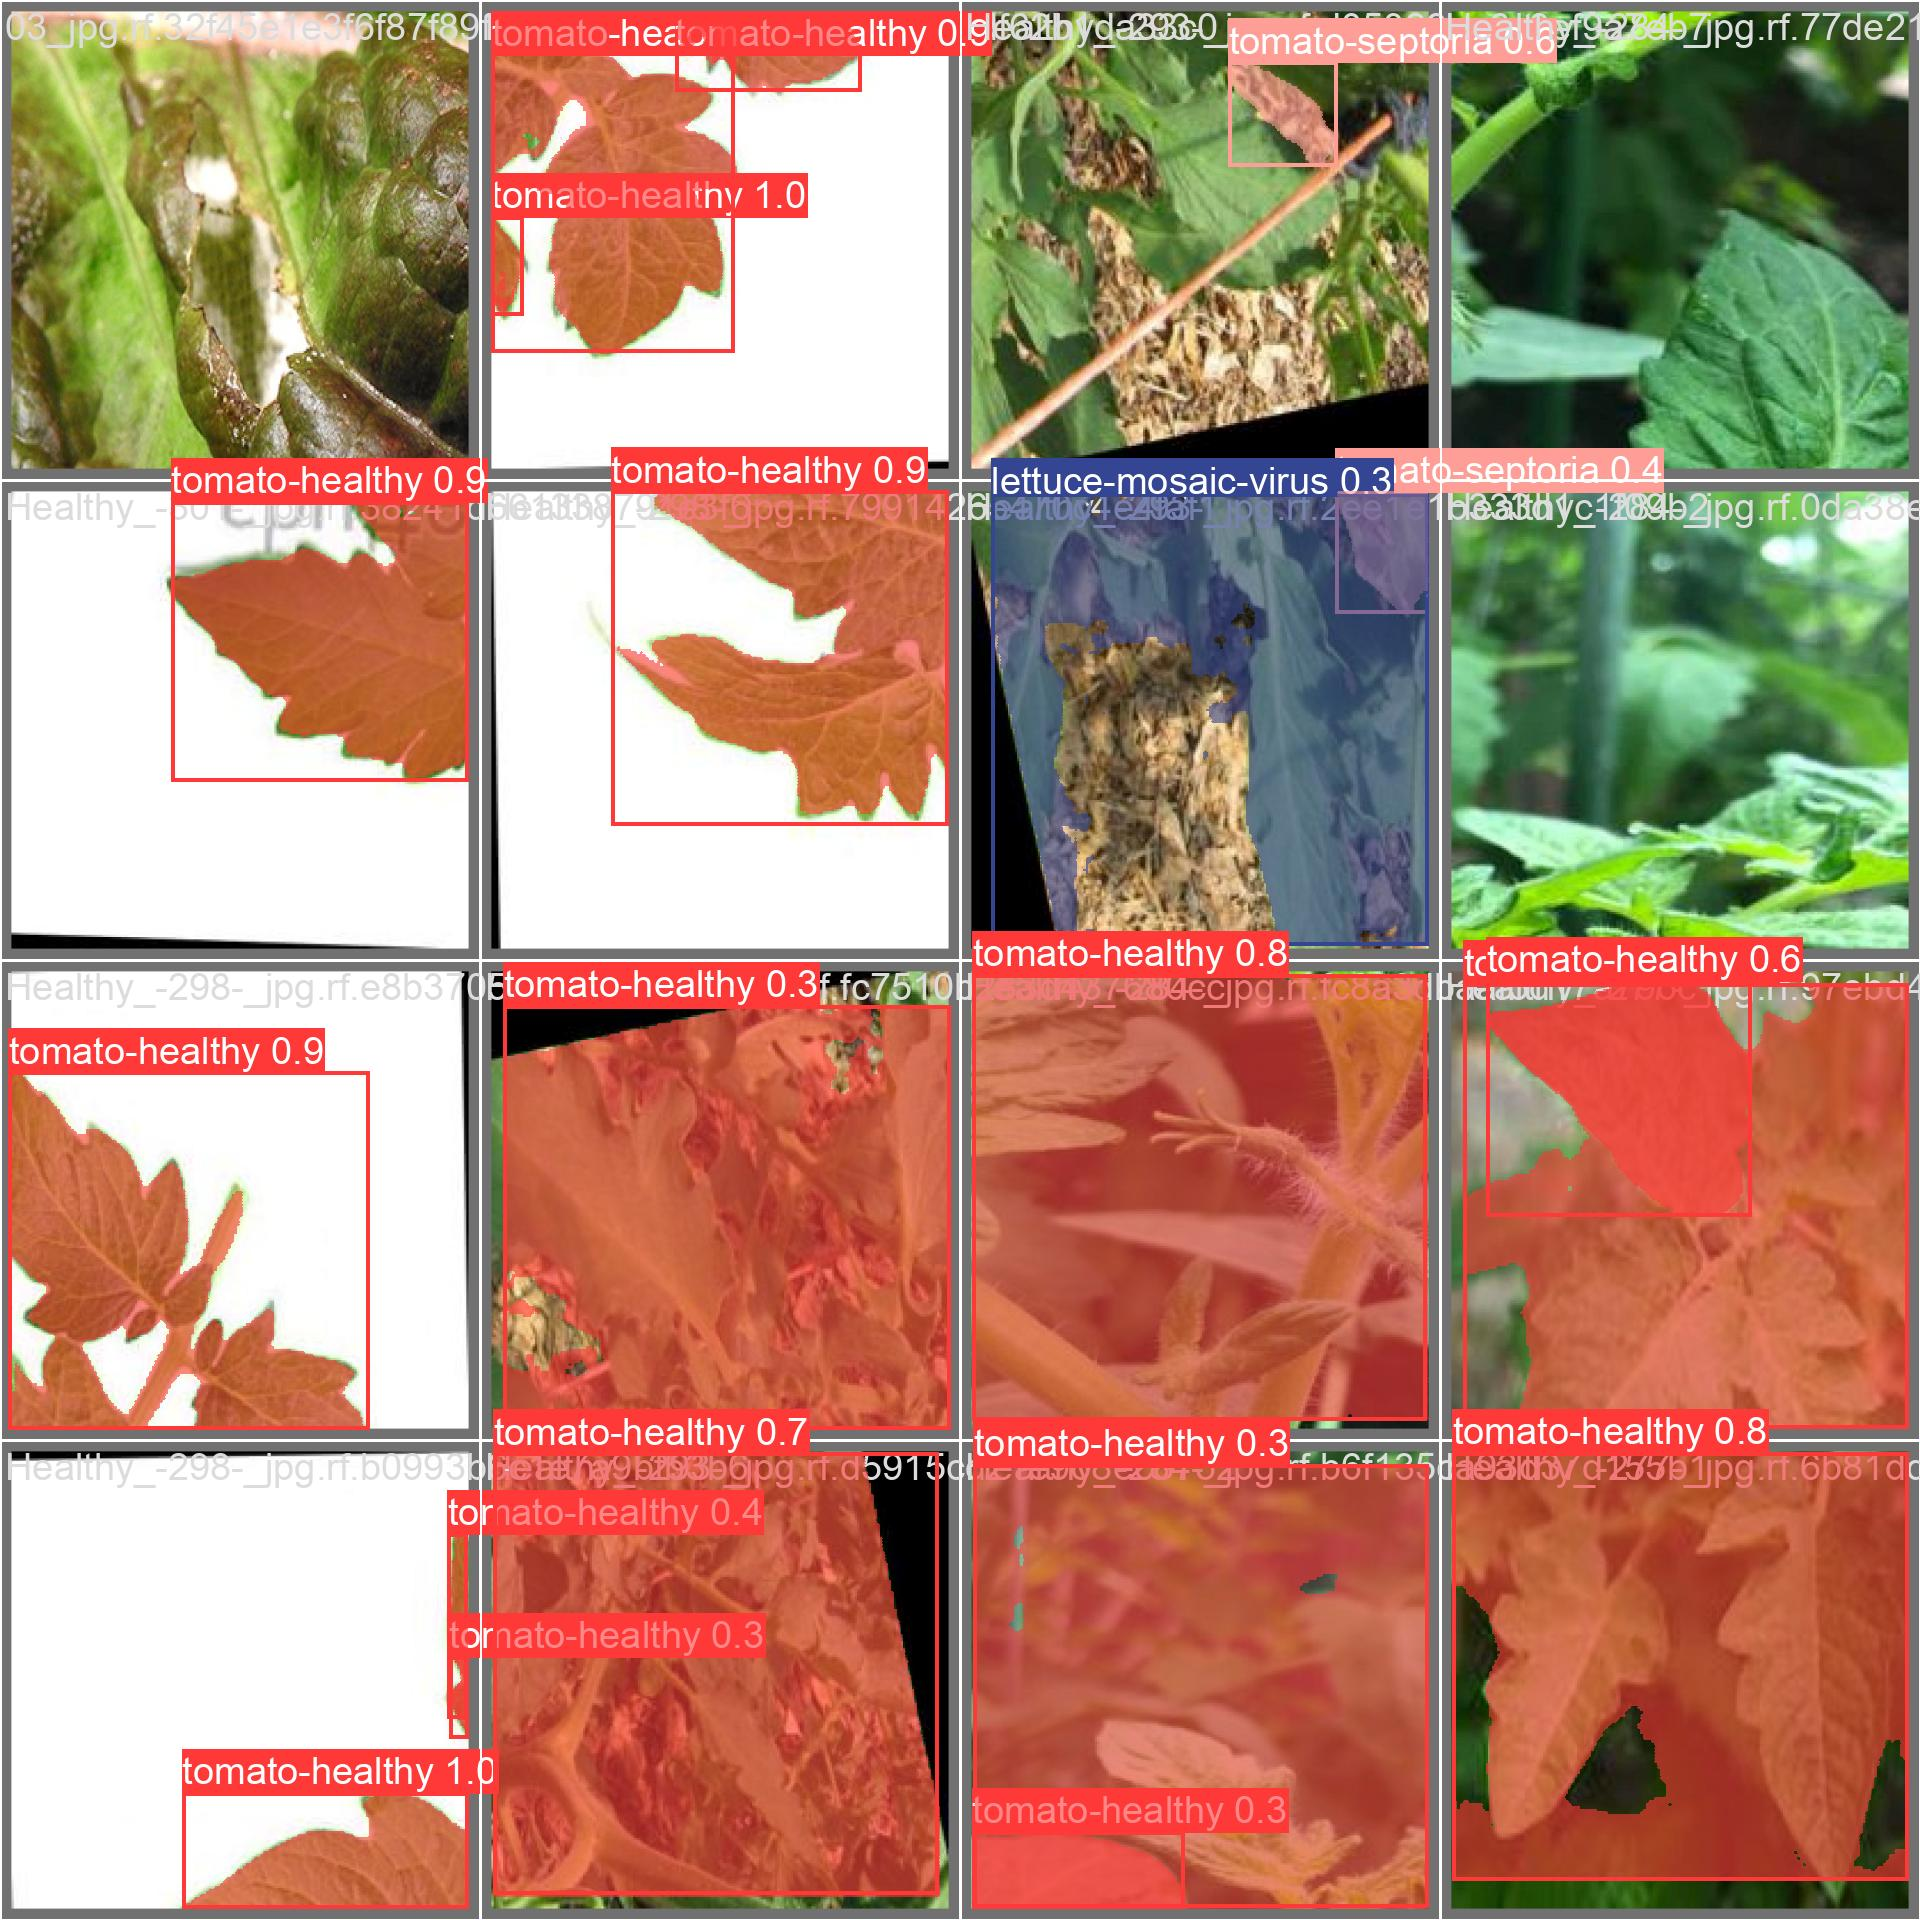

In [29]:
#displaying results of the validation set

Image(filename='/content/drive/MyDrive/runs/segment/train/val_batch0_pred.jpg', width=800)

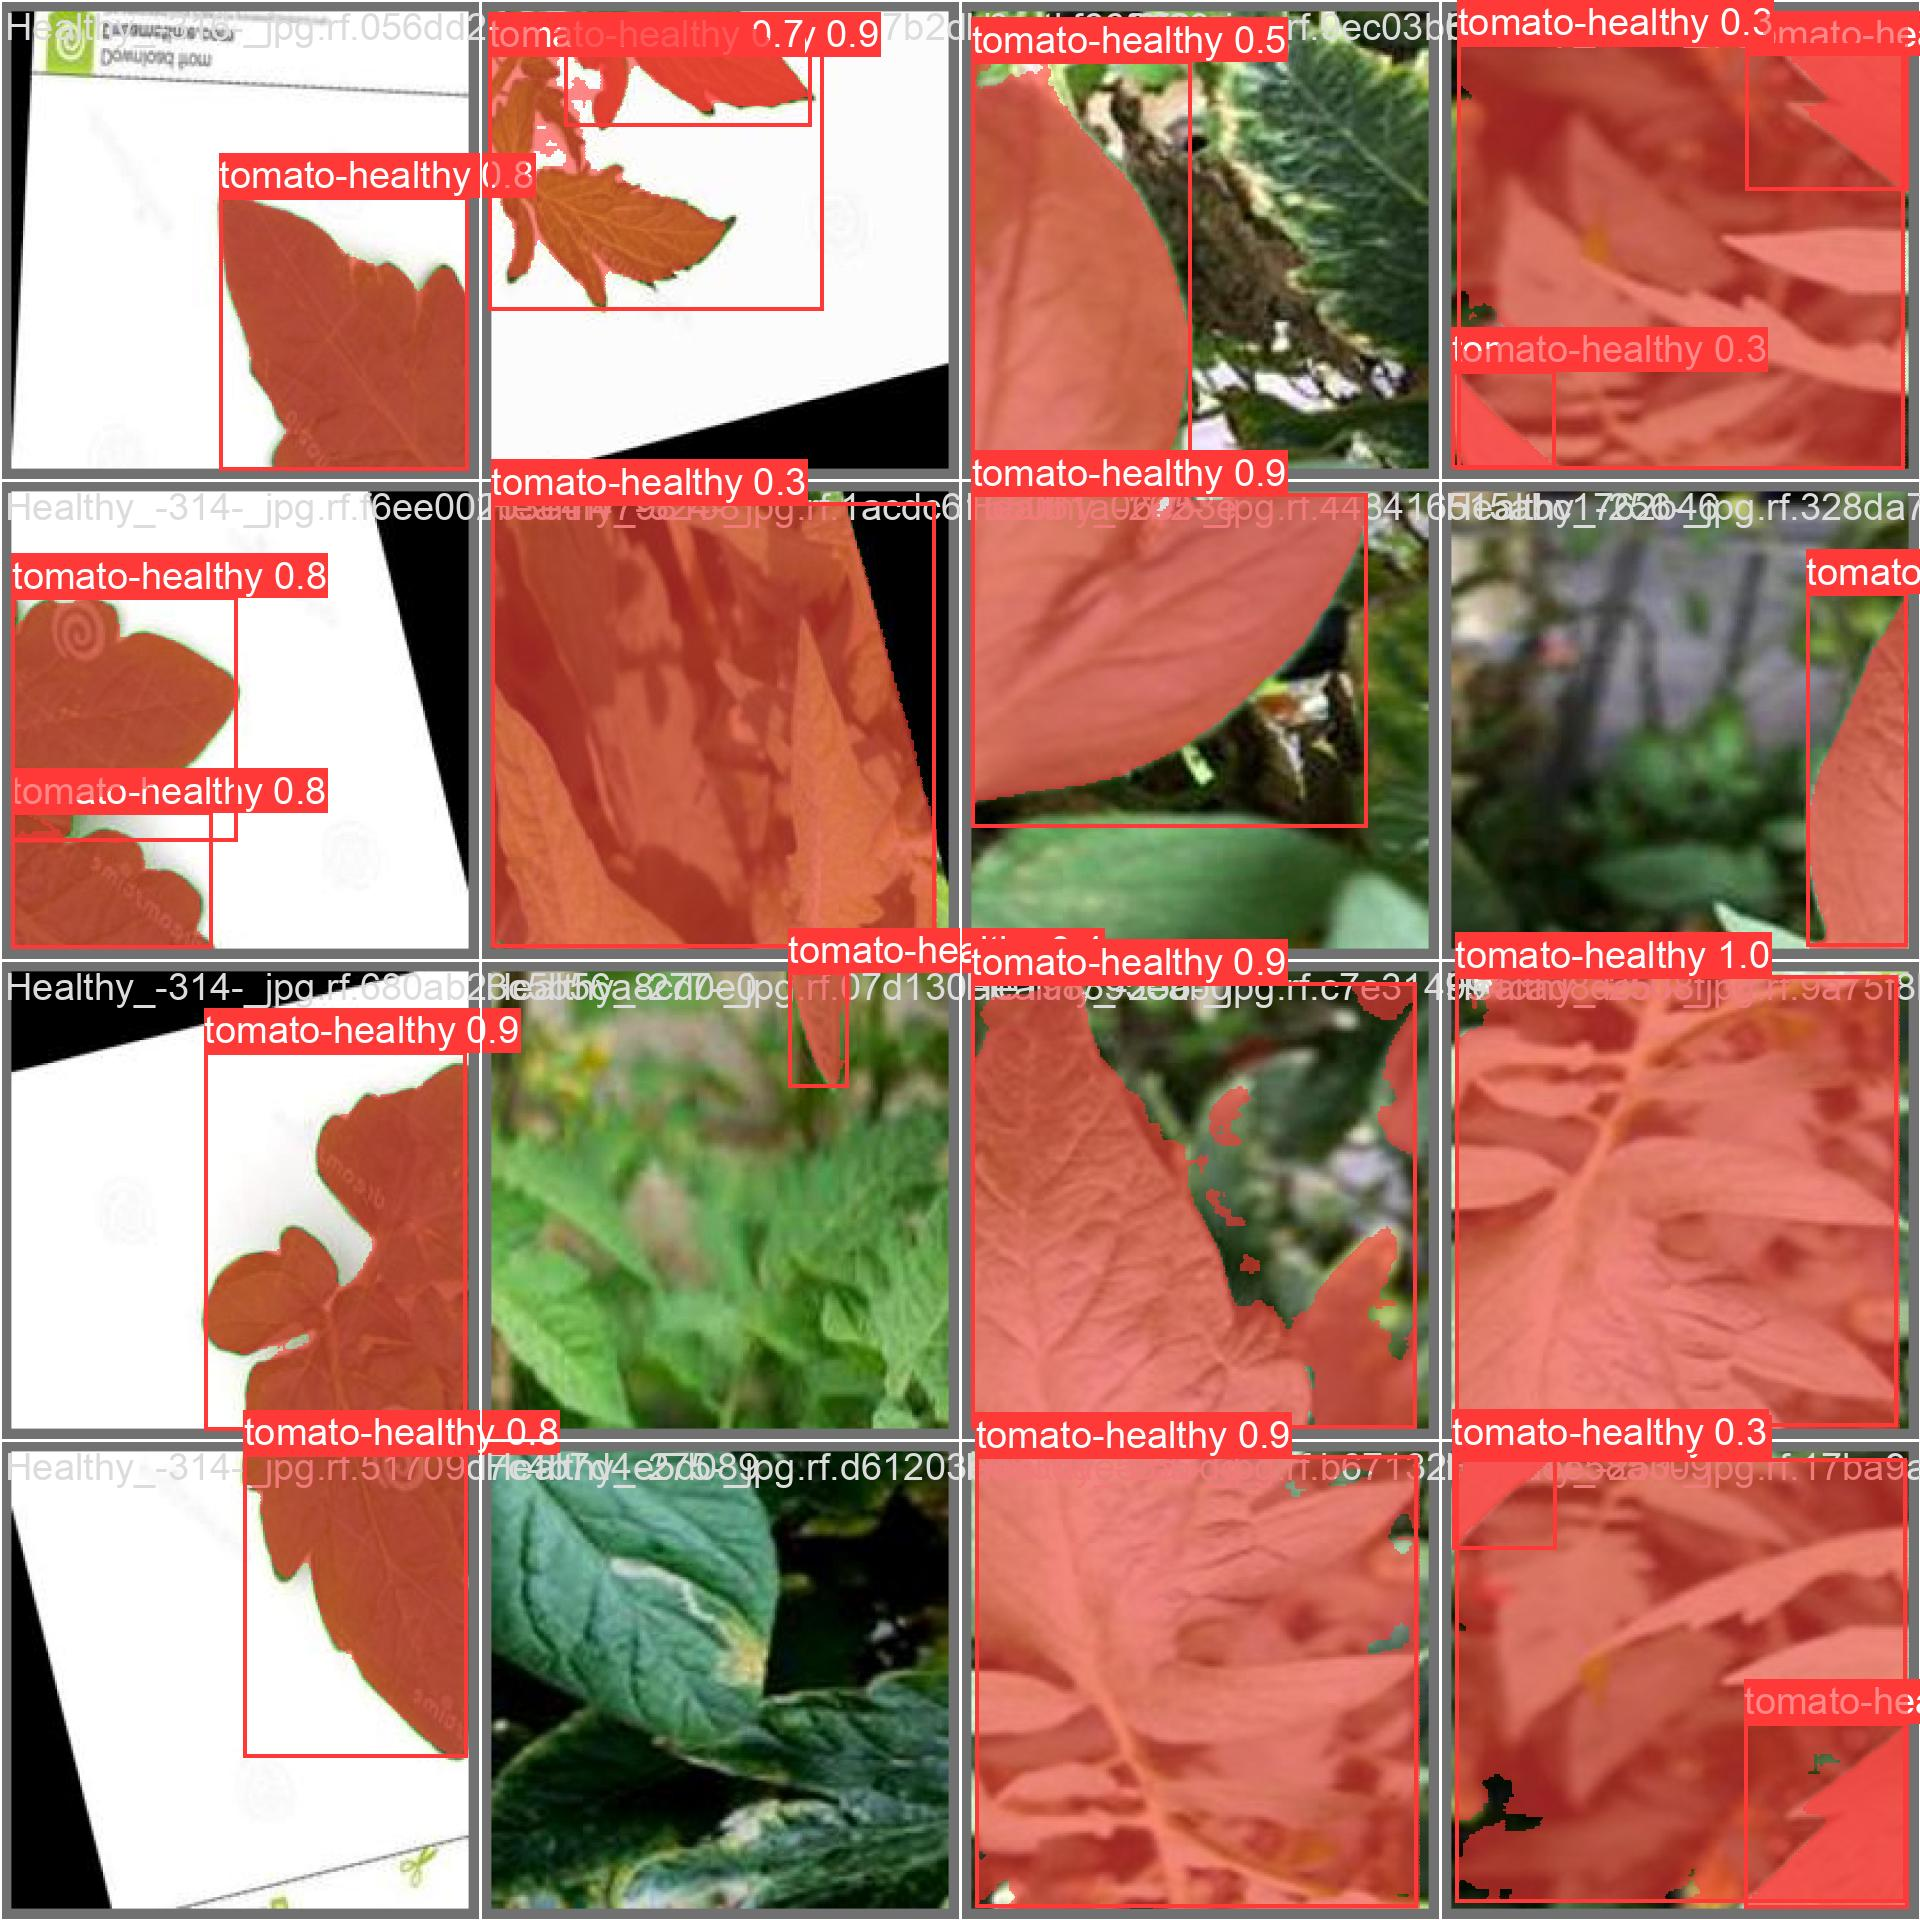

In [32]:

Image(filename='/content/drive/MyDrive/runs/segment/train/val_batch1_pred.jpg', width=800)

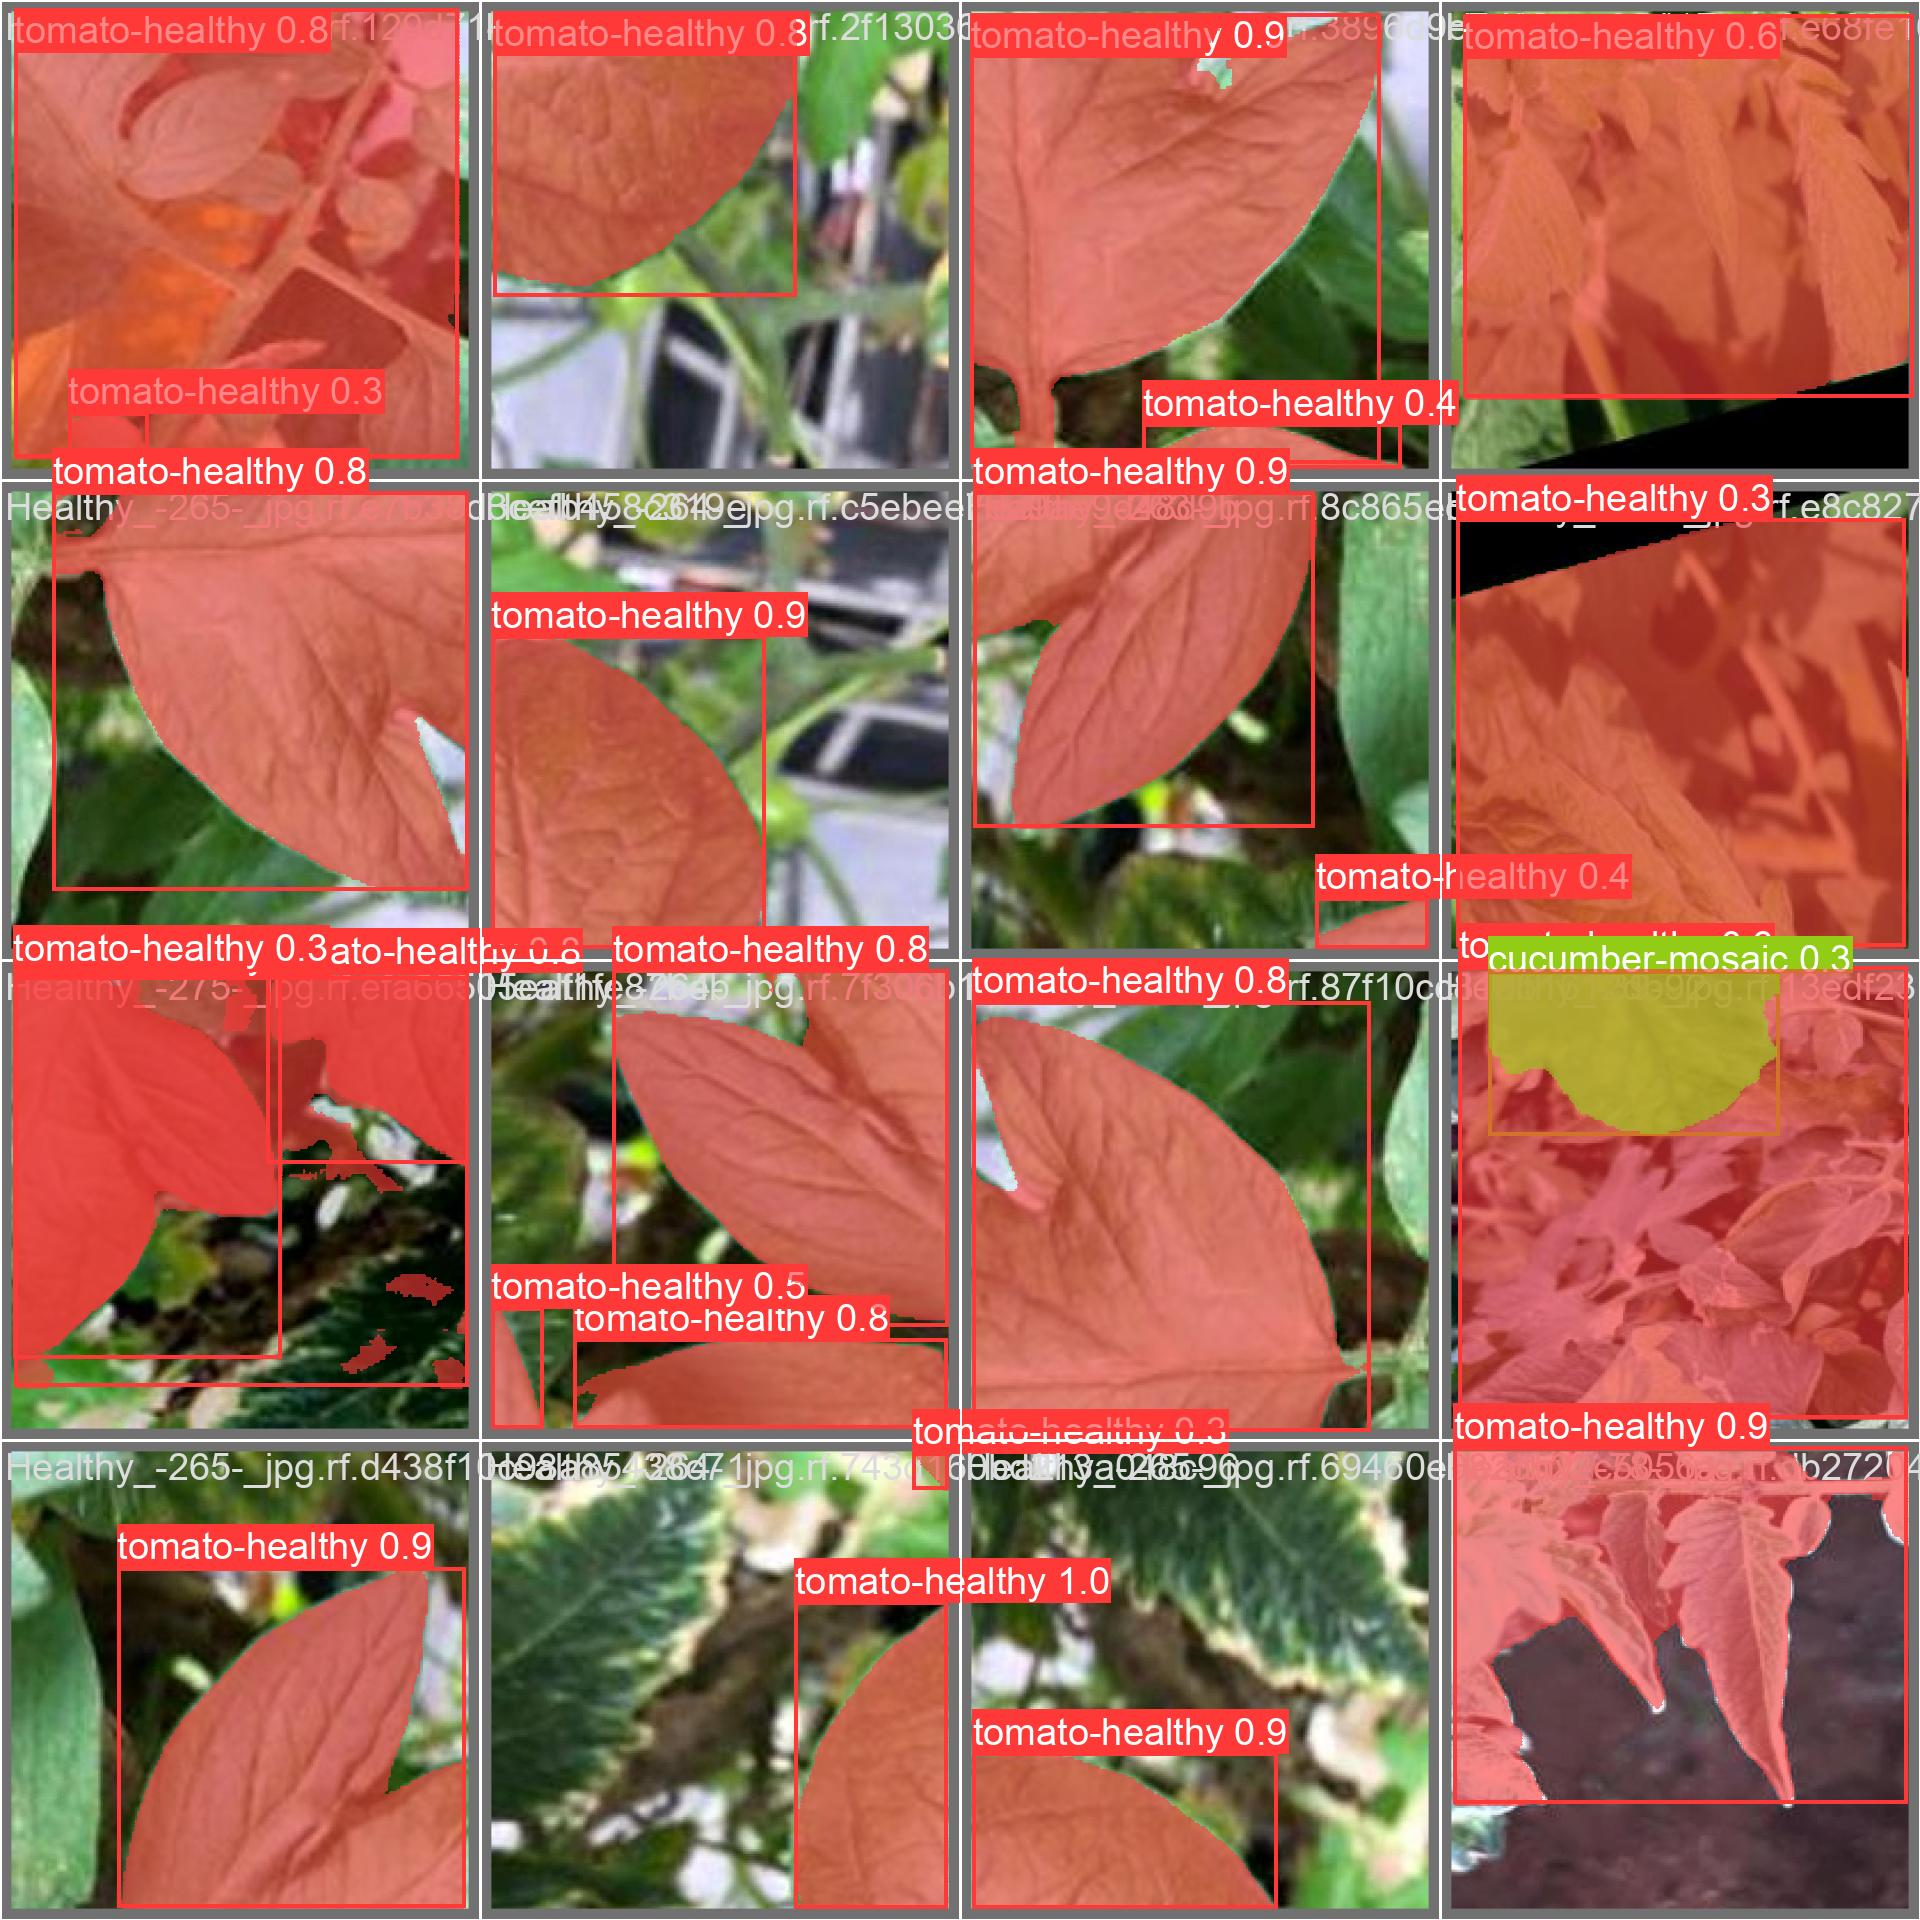

In [33]:
Image(filename='/content/drive/MyDrive/runs/segment/train/val_batch2_pred.jpg', width=800)

In [35]:
# Validating our model
%cd {'/content/drive/MyDrive'}

!yolo task=segment mode=val model={'/content/drive/MyDrive'}/runs/segment/train/weights/best.pt data={dataset.location}/data.yaml

/content/drive/MyDrive
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11788114 parameters, 0 gradients, 42.5 GFLOPs
val: Scanning /content/drive/MyDrive/Crop-Disease-Identification-6/valid/labels.cache... 1256 images, 83 backgrounds, 0 corrupt: 100% 1256/1256 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 79/79 [00:42<00:00,  1.84it/s]
                   all       1256       2209      0.471      0.327      0.312      0.233      0.445      0.321       0.31      0.221
bell pepper leaf-healthy       1256        148      0.553      0.493      0.507       0.38      0.554     

In [36]:
# Running inference of our model with a 25% confidence level

%cd {'/content/drive/MyDrive'}

!yolo task=segment mode=predict model={'/content/drive/MyDrive'}/runs/segment/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=true

/content/drive/MyDrive
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11788114 parameters, 0 gradients, 42.5 GFLOPs

image 1/636 /content/drive/MyDrive/Crop-Disease-Identification-6/test/images/01_jpg.rf.0206b33c74e516b86096d618f56eaee8.jpg: 640x640 1 lettuce-septoria, 21.0ms
image 2/636 /content/drive/MyDrive/Crop-Disease-Identification-6/test/images/01_jpg.rf.258627ade13a0ac94fc3b837a0b45076.jpg: 640x640 (no detections), 21.1ms
image 3/636 /content/drive/MyDrive/Crop-Disease-Identification-6/test/images/01_jpg.rf.a86f22242a6953d0bc2075eba44b0715.jpg: 640x640 (no detections), 20.9ms
image 4/636 /content/drive/MyDrive/Crop-Disease-Identification-6/test/images/01_jpg.rf.da213f38cac766e66b33075bb3deb156.jpg: 640x640 1 lettuce-downy mildew, 20.9ms
image 5/636 /content/drive/MyDrive/Crop-Disease-Identification-6/test/images/10_jpeg.rf.067b5509bd35da67b1e9f7a14e8d3b10.jpg: 640x640 5 bell pepper leaf-healthys, 

In [37]:
!ls {'/content/drive/MyDrive'}/runs/segment/predict/

01_jpg.rf.0206b33c74e516b86096d618f56eaee8.jpg
01_jpg.rf.258627ade13a0ac94fc3b837a0b45076.jpg
01_jpg.rf.a86f22242a6953d0bc2075eba44b0715.jpg
01_jpg.rf.da213f38cac766e66b33075bb3deb156.jpg
10_jpeg.rf.067b5509bd35da67b1e9f7a14e8d3b10.jpg
10_jpeg.rf.31701b96e70732d3bec875897dcc4bbf.jpg
10_jpeg.rf.4e4ad85e8e99eee0b38c23bf3c65feb3.jpg
10_jpeg.rf.8d2c0163528728b17bb7ab279c335bbc.jpg
12_jpeg.rf.047bc354de1667f70f1af41fe2ba3560.jpg
12_jpeg.rf.77e3c2fa51133f6407a4029ae5726aff.jpg
12_jpeg.rf.9f9cc27c516ab89dcde04134d91ecdde.jpg
12_jpeg.rf.a210193eaad7f394f85c5be315f96c12.jpg
12_jpeg.rf.bb20dbae3bcb990fe1d49cfe06fcb104.jpg
12_jpeg.rf.bf312c0d5eef1da71acb9f2729fce488.jpg
12_jpeg.rf.c3033316160a0b390e95320f8cad127b.jpg
12_jpeg.rf.dd507a61c2a8948b40e16a7733b5a9e3.jpg
12_jpg.rf.225bdbf9f5e91c34aac47f04c034626e.jpg
12_jpg.rf.509315dc42541df98a59f0f22e900a83.jpg
12_jpg.rf.56417395cc47f4fae983781dc28da81e.jpg
12_jpg.rf.f5aad52c86e40b8a77485d7181b8987d.jpg
13_jpg.rf.4a35020597770d2048e28615e118edea.jpg
1

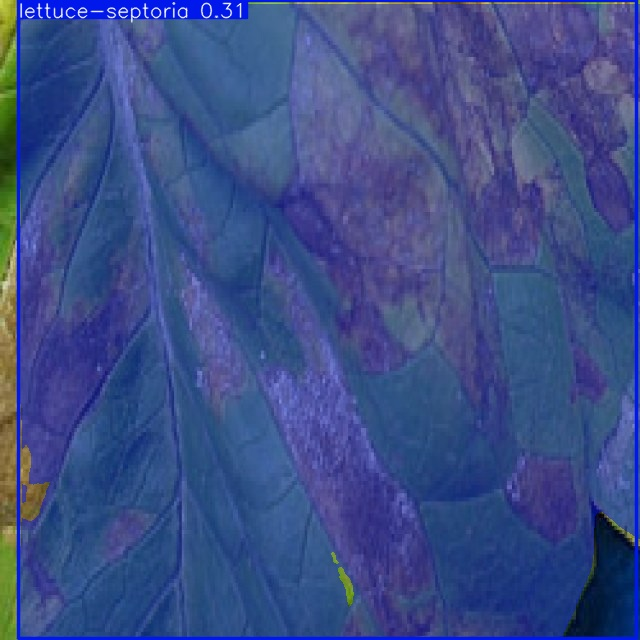

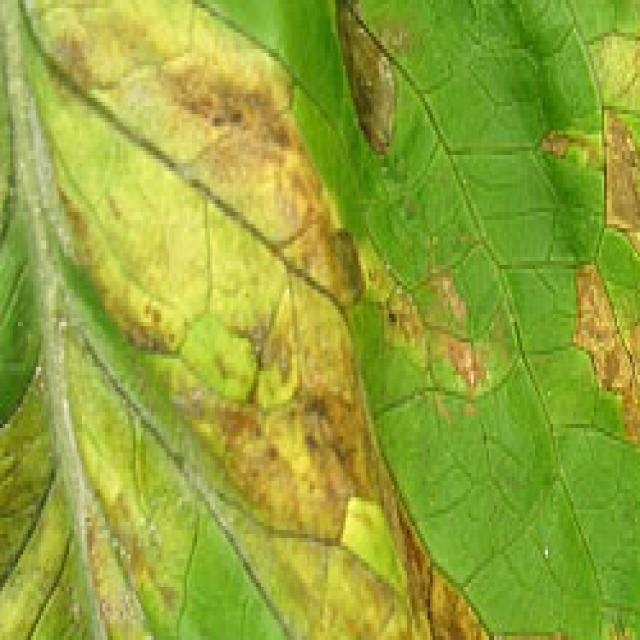

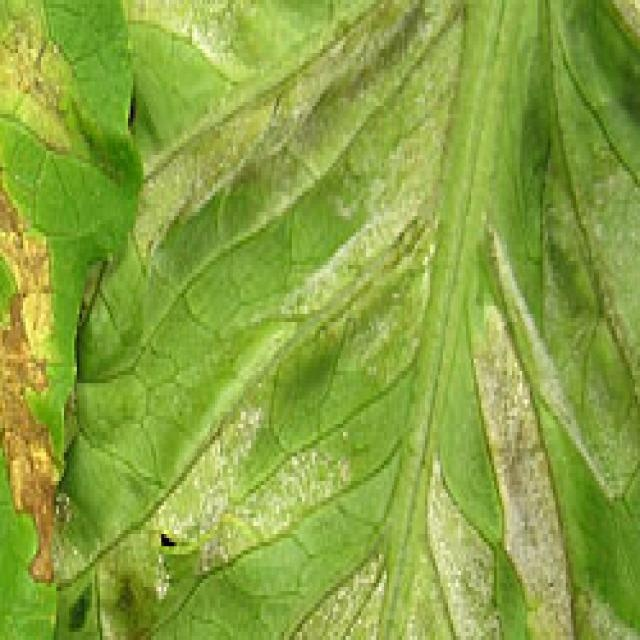

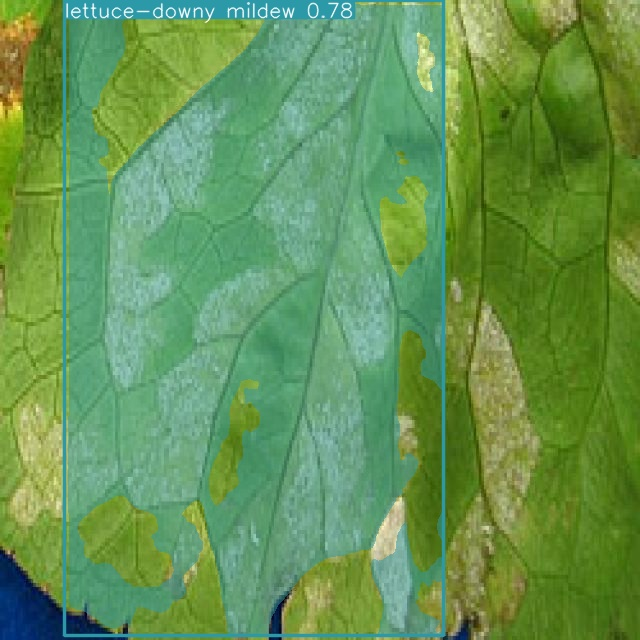

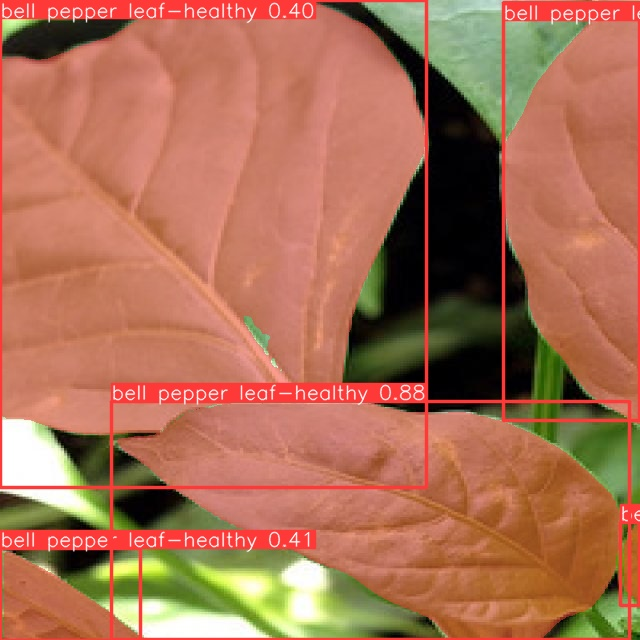

In [39]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('/content/drive/MyDrive/runs/segment/predict/*.jpg')[:5]:
      display(Image(filename=image_path, height=600))
      print("\n")

In [42]:
# Saving the model weights for autolabeling, autoscaling inference
project.version(dataset.version).deploy(model_type="yolov8-seg", model_path=f"{'/content/drive/MyDrive'}/runs/segment/train/") #yolov8s-seg.pt

View the status of your deployment at: https://app.roboflow.com/capstone-project-2wtea/crop-disease-identification/6
Share your model with the world at: https://universe.roboflow.com/capstone-project-2wtea/crop-disease-identification/model/6


In [45]:
#predict on unseen data
from ultralytics import YOLO

model = YOLO('/content/drive/MyDrive/yolov8s-seg.pt')
#results = model.predict(source="", conf=0.25)


In [ ]:
results[0].boxes.xyxy

In [ ]:
results[0].boxes.conf

In [ ]:
results[0].boxes.cls

In [ ]:
results[0].masks.masks